# Stage 2 Data Cleansing 

In [ ]:
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [ ]:
df.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


## Handle Outliers

In [ ]:
# Prior_purchases
Q1 = df['Prior_purchases'].quantile(0.25)
Q3 = df['Prior_purchases'].quantile(0.75)
IQR = Q3 - Q1
low_limit= Q1 - (1.5 * IQR)
high_limit = Q3 + (1.5 * IQR)
filtered_entries = ((df['Prior_purchases'] >= low_limit) & (df['Prior_purchases'] <= high_limit))
df = df[filtered_entries]

In [ ]:
# Discount_offered
z_scores = np.abs(stats.zscore(df['Discount_offered']))
filtered_entries = (z_scores < 3)
df = df[filtered_entries]

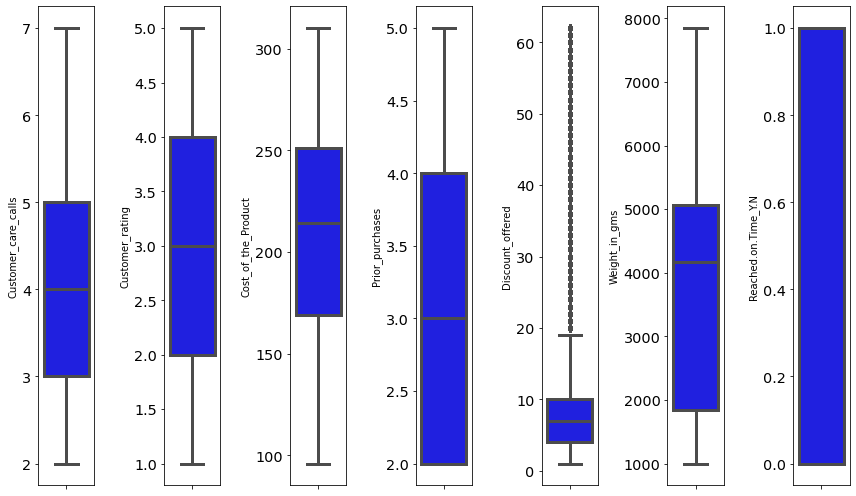

In [ ]:
features = numericals
for i in range(0, len(features)):
  plt.subplot(1, len(features), i+1)
  sns.boxplot(y = df[features[i]], color='blue', orient='v')
  plt.tight_layout()

Setelah dilakukan Handling Outliers, feature Prior_purchases sudah tidak ada outliers, tetapi untuk feature Discount_offered tetap terlihat outliers. Oleh karena itu, feature Discount_offered akan dilakukan log transformation agar distribusi menjadi normal.

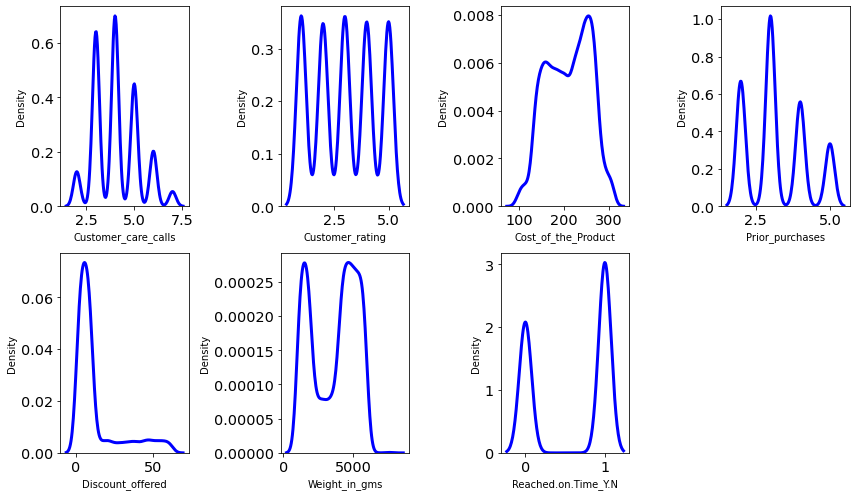

In [ ]:
features = numericals
for i in range(0, len(features)):
  plt.subplot(2,4, i+1)
  sns.kdeplot(x = df[features[i]], color='blue')
  plt.xlabel(features[i])
  plt.tight_layout()

## Feature Transformation

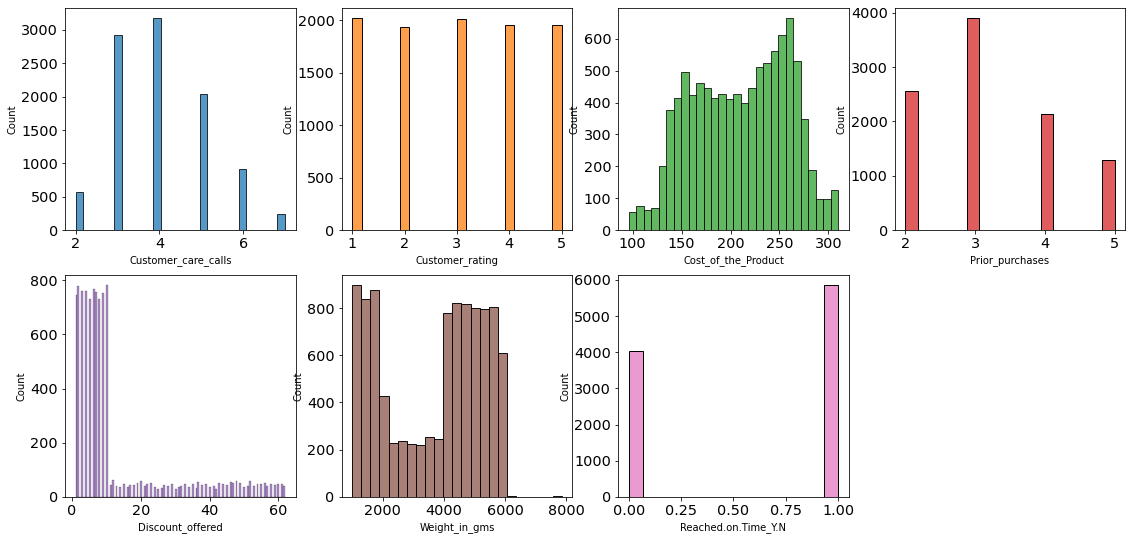

In [ ]:
plt.figure(figsize = (19, 9))
for i, num in enumerate(numericals):

    plt.subplot(2,4, i+1)
    sns.histplot(df[num], color=pal[i])
    
plt.show()


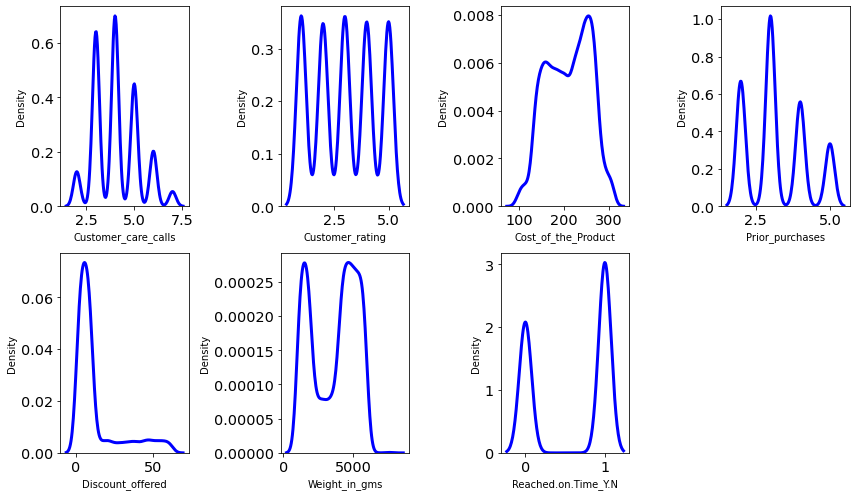

In [ ]:
features = numericals
for i in range(0, len(features)):
  plt.subplot(2,4, i+1)
  sns.kdeplot(x = df[features[i]], color='blue')
  plt.xlabel(features[i])
  plt.tight_layout()

In [ ]:
# Normalization dan Standardization
df['Cost_of_the_Product_norm'] = MinMaxScaler().fit_transform(df['Cost_of_the_Product'].values.reshape(len(df), 1))
df['Cost_of_the_Product_std'] = StandardScaler().fit_transform(df['Cost_of_the_Product'].values.reshape(len(df), 1))

In [ ]:
df[['Cost_of_the_Product','Cost_of_the_Product_norm', 'Cost_of_the_Product_std']].describe()

,Cost_of_the_Product,Cost_of_the_Product_norm,Cost_of_the_Product_std
count,9878.000000,9878.000000,9.878000e+03
mean,210.337315,0.534287,-2.215501e-16
std,48.160644,0.225050,1.000051e+00
min,96.000000,0.000000,-2.374202e+00
25%,169.000000,0.341121,-8.583649e-01
50%,214.000000,0.551402,7.605526e-02
75%,251.000000,0.724299,8.443563e-01
max,310.000000,1.000000,2.069485e+00


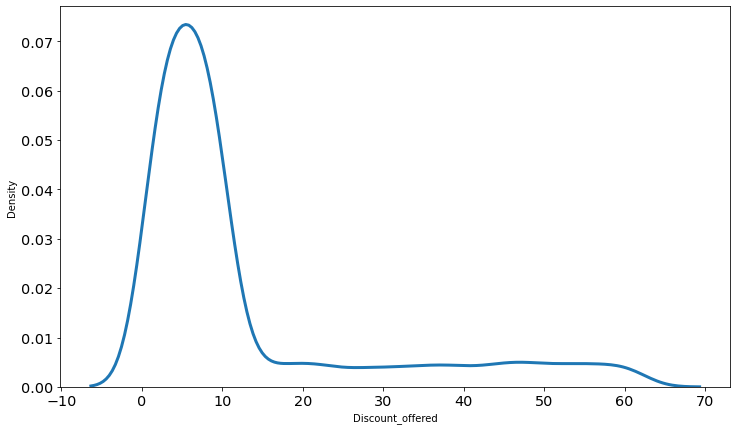

In [ ]:
#Sebelum dilakukan Log Transformation
sns.kdeplot(df['Discount_offered'])

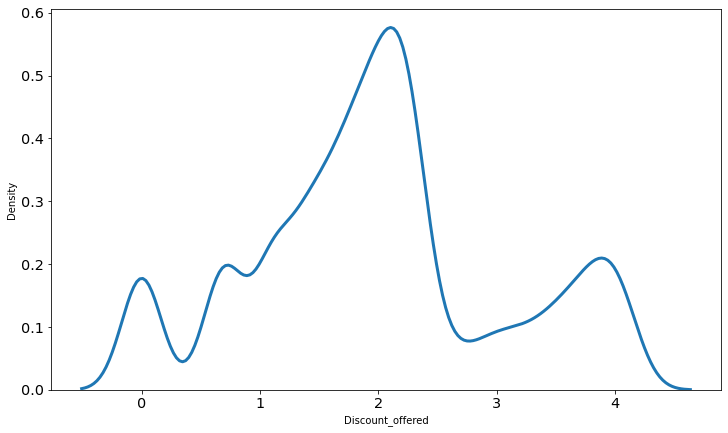

In [ ]:
#Setelah dilakukan log transformation
sns.kdeplot(np.log(df['Discount_offered']))

In [ ]:
df['Discount_offered'] = np.log(df['Discount_offered'])

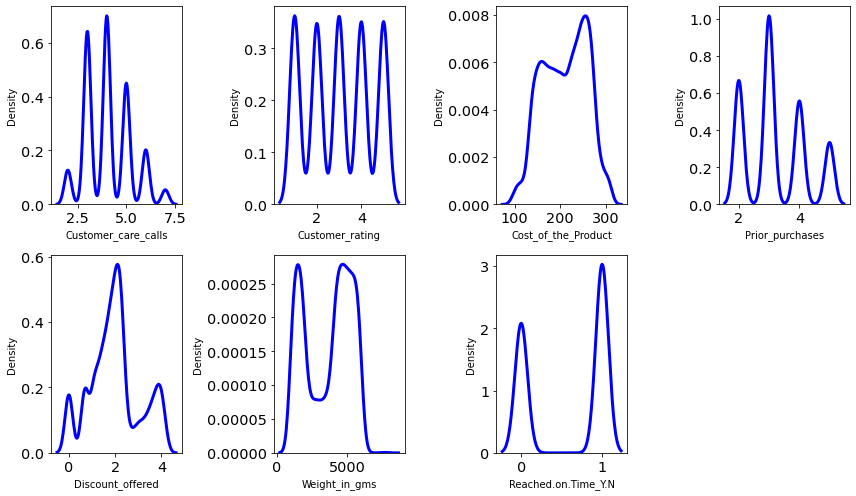

In [ ]:
features = numericals
for i in range(0, len(features)):
  plt.subplot(2,4, i+1)
  sns.kdeplot(x = df[features[i]], color='blue')
  plt.xlabel(features[i])
  plt.tight_layout()

Terlihat bahwa hasil distribusi pada feature discount_offered setelah dilakukan log transformation menjadi normal karena pada sebelumnya terlihat bahwa distribusinya terlihat right skewed